In [18]:
from dotenv import load_dotenv
load_dotenv()

True

In [1]:
from operator import add
from langchain_core.messages import HumanMessage, AIMessage

initial_messages = [
    AIMessage(content="Hello! How can I assist you?", name="Model", id="1"),
    HumanMessage(content="I am looking for information on marine biology", name="Lance", id="2")
]

new_message = HumanMessage(content="I am looking information on whales, specifically", name="Lance", id="2")

add(initial_messages, [new_message])

[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='1'),
 HumanMessage(content='I am looking for information on marine biology', additional_kwargs={}, response_metadata={}, name='Lance', id='2'),
 HumanMessage(content='I am looking information on whales, specifically', additional_kwargs={}, response_metadata={}, name='Lance', id='2')]

In [2]:
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph.message import add_messages

initial_messages = [
    AIMessage(content="Hello! How can I assist you?", name="Model", id="1"),
    HumanMessage(content="I am looking for information on marine biology", name="Lance", id="2")
]

new_message = HumanMessage(content="I am looking information on whales, specifically", name="Lance", id="2")

add_messages(initial_messages, [new_message])

[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='1'),
 HumanMessage(content='I am looking information on whales, specifically', additional_kwargs={}, response_metadata={}, name='Lance', id='2')]

In [3]:
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph.message import add_messages

initial_messages = [
    AIMessage(content="Hello! How can I assist you?", name="Model"),
    HumanMessage(content="I am looking for information on marine biology", name="Lance")
]

new_message = HumanMessage(content="I am looking information on whales, specifically", name="Lance")

add_messages(initial_messages, [new_message])

[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='38006d2b-3cb9-4322-8ed5-ccd07df2e86b'),
 HumanMessage(content='I am looking for information on marine biology', additional_kwargs={}, response_metadata={}, name='Lance', id='c42290c7-7a71-481b-a2d9-61aea896432f'),
 HumanMessage(content='I am looking information on whales, specifically', additional_kwargs={}, response_metadata={}, name='Lance', id='3c1cd0e3-f815-4682-8d50-0b2d8e165bb0')]

In [7]:
messages = [
    AIMessage("Message1", name="bot", id="1"),
    HumanMessage("Message2", name="user", id="2"),
    AIMessage("Message3", name="bot", id="3"),
    HumanMessage("Message4", name="user", id="4")
]

messages

[AIMessage(content='Message1', additional_kwargs={}, response_metadata={}, name='bot', id='1'),
 HumanMessage(content='Message2', additional_kwargs={}, response_metadata={}, name='user', id='2'),
 AIMessage(content='Message3', additional_kwargs={}, response_metadata={}, name='bot', id='3'),
 HumanMessage(content='Message4', additional_kwargs={}, response_metadata={}, name='user', id='4')]

In [9]:
from langchain_core.messages import RemoveMessage

deleted_messages = [RemoveMessage(m.id) for m in messages[:-2]]
deleted_messages

[RemoveMessage(content='', additional_kwargs={}, response_metadata={}, id='1'),
 RemoveMessage(content='', additional_kwargs={}, response_metadata={}, id='2')]

In [10]:
add_messages(messages, deleted_messages)

[AIMessage(content='Message3', additional_kwargs={}, response_metadata={}, name='bot', id='3'),
 HumanMessage(content='Message4', additional_kwargs={}, response_metadata={}, name='user', id='4')]

In [1]:
from langchain.agents import tool

@tool
def multiply(a: int, b: int) -> int:
    """Multiply a a nd b
    
    Args: 
        a: first int
        b: second int
    """
    
    return a * b

@tool
def add(a: int, b: int) -> int:
    """Add a a nd b
    
    Args: 
        a: first int
        b: second int
    """
    
    return a + b

@tool
def divide(a: int, b: int) -> float:
    """Divide a a nd b
    
    Args: 
        a: first int
        b: second int
    """
    

In [2]:
from langchain_community.tools.openweathermap import OpenWeatherMapQueryRun
from langchain_openai import ChatOpenAI

tools = [OpenWeatherMapQueryRun(), add, multiply, divide]
llm = ChatOpenAI(model="gpt-4o-mini")
model = llm.bind_tools(tools)


In [3]:
def function_1(state):
    messages = state["messages"]
    response = model.invoke(messages)
    return {"messages": [response]}

In [23]:
inputs = {"messages": [HumanMessage("what is temparature in chennai")]}
function_1(inputs)

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_VNNdVzRz1FMa0yytKbjdwtDd', 'function': {'arguments': '{"location":"Chennai,IN"}', 'name': 'open_weather_map'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 190, 'total_tokens': 208, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CPA839jJLr2HlueMZNq8IXQrtfryj', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--92fae489-3cac-44a9-a2b0-78db3822d133-0', tool_calls=[{'name': 'open_weather_map', 'args': {'location': 'Chennai,IN'}, 'id': 'call_VNNdVzRz1FMa0yytKbjdwtDd', 'type': 'tool_call'}], usage_metadata={'input_tokens': 190, 'output_tokens': 18, 'total

In [24]:
inputs = {"messages": [HumanMessage("tell me about modi in one sentence")]}
function_1(inputs)

{'messages': [AIMessage(content='Narendra Modi is the Prime Minister of India, known for his leadership since 2014, his role in implementing economic reforms, and a focus on nationalism and development.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 35, 'prompt_tokens': 189, 'total_tokens': 224, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CPA8yPH8U5Me2mh8K9pucBEGnQW0V', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--231583f7-1a33-46e6-a13c-05057266287d-0', usage_metadata={'input_tokens': 189, 'output_tokens': 35, 'total_tokens': 224, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [4]:
def where_to_go(state):
    message = state["messages"][-1]
    if "tool_calls" in message.additional_kwargs:
        return "continue"
    else:
        return "end"
    

In [5]:
from typing import TypedDict, Annotated
from langgraph.graph import add_messages

class AgentState(TypedDict):
    messages: Annotated[list, add_messages]

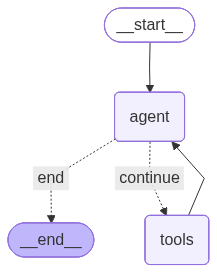

In [34]:
from langgraph.graph import StateGraph, END
from langgraph.prebuilt import ToolNode
from langgraph.types import RetryPolicy
from IPython.display import Image

workflow = StateGraph(state_schema=AgentState)
workflow.add_node("agent", function_1)
workflow.add_node("tools", ToolNode(tools), retry_policy=RetryPolicy(max_attempts=5))

workflow.add_conditional_edges("agent", 
                               where_to_go, {
                                    "continue": "tools",
                                    "end": END
                                })

workflow.add_edge("tools", "agent")

workflow.set_entry_point("agent")

app = workflow.compile()
Image(app.get_graph().draw_mermaid_png())

In [32]:
inputs = {"messages": [HumanMessage("what is the humidity in chennai")]}
app.invoke(inputs)

{'messages': [HumanMessage(content='what is the humidity in chennai', additional_kwargs={}, response_metadata={}, id='8bca0838-05f0-4b37-a9b8-9f7c524725db'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_NtgFgtzGuPT4ZOG259Z0i6I7', 'function': {'arguments': '{"location":"Chennai,IN"}', 'name': 'open_weather_map'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 189, 'total_tokens': 207, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CPAeNXXUGEpSTFF3vSECkfF5QoFnx', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--70874a93-7603-40fa-9eba-c813150bf449-0', tool_calls=[{'name': 'open_weather_map', 'args': {'locati

In [35]:
inputs = {"messages": [HumanMessage("tell me about elon musk in one sentence")]}
app.invoke(inputs)

{'messages': [HumanMessage(content='tell me about elon musk in one sentence', additional_kwargs={}, response_metadata={}, id='afec01f4-a3fd-4d51-931e-5ca376c1afd5'),
  AIMessage(content='Elon Musk is a billionaire entrepreneur and CEO known for founding SpaceX, co-founding Tesla, Inc., and advocating for innovative technologies in transportation, energy, and space exploration.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 37, 'prompt_tokens': 191, 'total_tokens': 228, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CPAwRF5Y9UDIyBXTevEehkgO8MxlW', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--7793184d-6eb2-4d78-a92b-9b05ce507cc0-0', usage_metadata={'input_t

In [36]:
inputs = {"messages": [HumanMessage("what is my earlier question?")]}
app.invoke(inputs)

{'messages': [HumanMessage(content='what is my earlier question?', additional_kwargs={}, response_metadata={}, id='ede7e9a1-619d-4999-9d2d-268859c7b9d0'),
  AIMessage(content="I'm unable to recall previous interactions or questions you've asked. However, I'm here to help you with any current questions or topics you have in mind! What would you like to know?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 37, 'prompt_tokens': 188, 'total_tokens': 225, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CPAzbR3e8suNXJAqFkSX1VgRtkaO4', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--9af79a1b-42eb-4a87-b663-389cbaccaa7e-0', usage_metadata={'input_tokens': 188, 'output

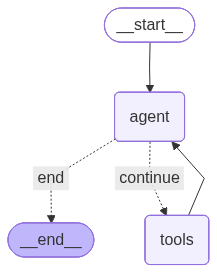

In [6]:
from langgraph.graph import StateGraph, END
from langgraph.prebuilt import ToolNode
from langgraph.types import RetryPolicy
from IPython.display import Image
from langgraph.checkpoint.memory import MemorySaver

workflow = StateGraph(state_schema=AgentState)
workflow.add_node("agent", function_1)
workflow.add_node("tools", ToolNode(tools), retry_policy=RetryPolicy(max_attempts=5))

workflow.add_conditional_edges("agent", 
                               where_to_go, {
                                    "continue": "tools",
                                    "end": END
                                })

workflow.add_edge("tools", "agent")

workflow.set_entry_point("agent")

memory_saver = MemorySaver()
app = workflow.compile(checkpointer=memory_saver)
Image(app.get_graph().draw_mermaid_png())

In [9]:
from langchain_core.messages import HumanMessage

config = {"configurable": {"thread_id": 1}}
inputs = {"messages": [HumanMessage("tell me about elon musk in one sentence")]}
app.invoke(inputs, config=config)

{'messages': [HumanMessage(content='tell me about elon musk in one sentence', additional_kwargs={}, response_metadata={}, id='0734fe04-6a47-40bf-9ea5-01f6007d2224'),
  AIMessage(content='Elon Musk is a billionaire entrepreneur and CEO known for founding and leading companies such as Tesla, SpaceX, Neuralink, and The Boring Company, focusing on innovation in electric vehicles, space exploration, and advanced technologies.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 191, 'total_tokens': 237, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CPqva2LeFaFW9KRPm9Sw2CiWKAwVR', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--30386d77-bfa9-4a0e-8

In [11]:
inputs = {"messages": [HumanMessage("what is my earlier question?")]}
app.invoke(inputs, config=config)

{'messages': [HumanMessage(content='tell me about elon musk in one sentence', additional_kwargs={}, response_metadata={}, id='0734fe04-6a47-40bf-9ea5-01f6007d2224'),
  AIMessage(content='Elon Musk is a billionaire entrepreneur and CEO known for founding and leading companies such as Tesla, SpaceX, Neuralink, and The Boring Company, focusing on innovation in electric vehicles, space exploration, and advanced technologies.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 191, 'total_tokens': 237, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CPqva2LeFaFW9KRPm9Sw2CiWKAwVR', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--30386d77-bfa9-4a0e-8

In [12]:
inputs = {"messages": [HumanMessage("what is 2+3")]}
app.invoke(inputs, config=config)

{'messages': [HumanMessage(content='tell me about elon musk in one sentence', additional_kwargs={}, response_metadata={}, id='0734fe04-6a47-40bf-9ea5-01f6007d2224'),
  AIMessage(content='Elon Musk is a billionaire entrepreneur and CEO known for founding and leading companies such as Tesla, SpaceX, Neuralink, and The Boring Company, focusing on innovation in electric vehicles, space exploration, and advanced technologies.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 191, 'total_tokens': 237, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CPqva2LeFaFW9KRPm9Sw2CiWKAwVR', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--30386d77-bfa9-4a0e-8

In [13]:
inputs = {"messages": [HumanMessage("what is my earlier question?")]}
app.invoke(inputs, config=config)

{'messages': [HumanMessage(content='tell me about elon musk in one sentence', additional_kwargs={}, response_metadata={}, id='0734fe04-6a47-40bf-9ea5-01f6007d2224'),
  AIMessage(content='Elon Musk is a billionaire entrepreneur and CEO known for founding and leading companies such as Tesla, SpaceX, Neuralink, and The Boring Company, focusing on innovation in electric vehicles, space exploration, and advanced technologies.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 191, 'total_tokens': 237, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CPqva2LeFaFW9KRPm9Sw2CiWKAwVR', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--30386d77-bfa9-4a0e-8

In [14]:
config = {"configurable": {"thread_id": 2}}
inputs = {"messages": [HumanMessage("what is my earlier question?")]}
app.invoke(inputs, config=config)

{'messages': [HumanMessage(content='what is my earlier question?', additional_kwargs={}, response_metadata={}, id='4f658a49-acb0-4f01-bf4b-afa6a348a232'),
  AIMessage(content="I'm unable to access previous interactions or questions. However, if you'd like to repeat or rephrase your question, I'm here to help!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 188, 'total_tokens': 216, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CPrMm61iEw3DoP66pEeAmdsIpexZH', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--7937adce-bb79-417f-a905-69b3801b6635-0', usage_metadata={'input_tokens': 188, 'output_tokens': 28, 'total_tokens': 216, 'input_token_d

In [15]:
class OverallState(TypedDict):
    question: str
    answer: str
    notes: str
    

def thinking_node(state: OverallState):
    return {"answer": "bye", "notes": "... his name is Leela"}

def answer_node(state: OverallState):
    return {"answer": "bye Leela"}

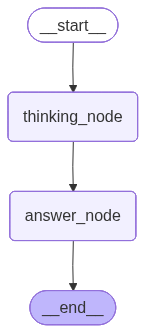

In [19]:
from langgraph.constants import START, END

workflow = StateGraph(state_schema=OverallState)
workflow.add_node("thinking_node", thinking_node)
workflow.add_node("answer_node", answer_node)

workflow.add_edge(START, "thinking_node")
workflow.add_edge("thinking_node", "answer_node")
workflow.add_edge("answer_node", END)

graph = workflow.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [20]:
graph.invoke({"question": "hi"})

{'question': 'hi', 'answer': 'bye Leela', 'notes': '... his name is Leela'}

In [29]:
class InputState(TypedDict):
    question: str
    
class OutputState(TypedDict):
    answer: str

class OverallState(TypedDict):
    question: str
    answer: str
    notes: str
    
def thinking_node(state: InputState) -> OverallState:
    return {"answer": "bye", "notes": "... his name is Leela"}

def answer_node(state: OverallState) -> OutputState:
    return {"answer": "bye Leela"}

In [31]:
from langgraph.constants import START, END

workflow = StateGraph(state_schema=OverallState, input_schema=InputState, output_schema=OutputState)
workflow.add_node("thinking_node", thinking_node)
workflow.add_node("answer_node", answer_node)

workflow.add_edge(START, "thinking_node")
workflow.add_edge("thinking_node", "answer_node")
workflow.add_edge("answer_node", END)

graph = workflow.compile()

graph.invoke({"question": "hi"})

{'answer': 'bye Leela'}